### Decision Tree Classification: European vs Oceania Flags 

In [13]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

### 📥 Data Loading 

In [14]:
cols = [
    'name','landmass','zone','area','population','language','religion',
    'bars','stripes','colours','red','green','blue','gold','white',
    'black','orange','mainhue','circles','crosses','saltires',
    'quarters','sunstars','crescent','triangle','icon','animate',
    'text','topleft','botright'
]

df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data",
    names=cols
)

df.head()


,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


### 🔍 Feature Selection

In [15]:

var = [
    'red','green','blue','gold','white','black','orange',
    'bars','stripes','circles','crosses','saltires',
    'quarters','sunstars','triangle','animate'
]


In [16]:
print("Countries per landmass:")
print(df.landmass.value_counts())
df_36 = df[df['landmass'].isin([3, 6])]
labels = df_36['landmass']
print("Average flag features by landmass:")
print(df_36.groupby('landmass')[var].mean().T)


Countries per landmass:
landmass
4    52
5    39
3    35
1    31
6    20
2    17
Name: count, dtype: int64
Average flag features by landmass:
landmass         3     6
red       0.828571  0.80
green     0.200000  0.20
blue      0.514286  0.80
gold      0.428571  0.60
white     0.771429  0.95
black     0.171429  0.15
orange    0.057143  0.15
bars      0.628571  0.00
stripes   1.285714  0.40
circles   0.028571  0.15
crosses   0.285714  0.40
saltires  0.028571  0.30
quarters  0.028571  0.40
sunstars  0.142857  3.30
triangle  0.028571  0.25
animate   0.114286  0.30


In [17]:
data = pd.get_dummies(df_36[var])

### ✂️ Train–Test Split

In [18]:
train_data, test_data, train_labels, test_labels = train_test_split(
data, labels, test_size=0.4, random_state=1
)

### 🌳 Decision Tree: Depth Tuning

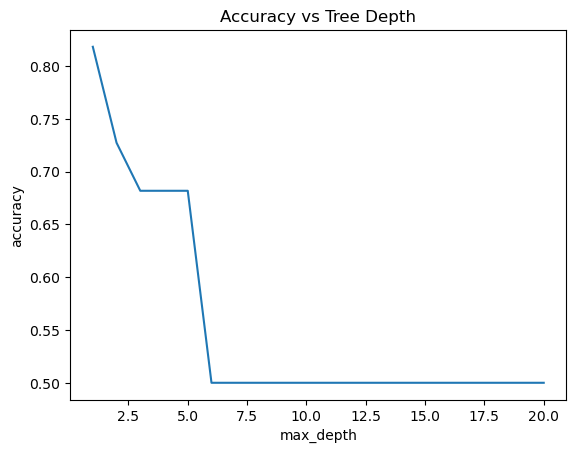

In [19]:
depths = range(1, 21)
acc_depth = []

for d in depths:
    dt = DecisionTreeClassifier(random_state=10, max_depth=d)
    dt.fit(train_data, train_labels)
    acc_depth.append(dt.score(test_data, test_labels))

plt.plot(depths, acc_depth)
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.title("Accuracy vs Tree Depth")
plt.show()


Highest accuracy: 81.82% at depth 1


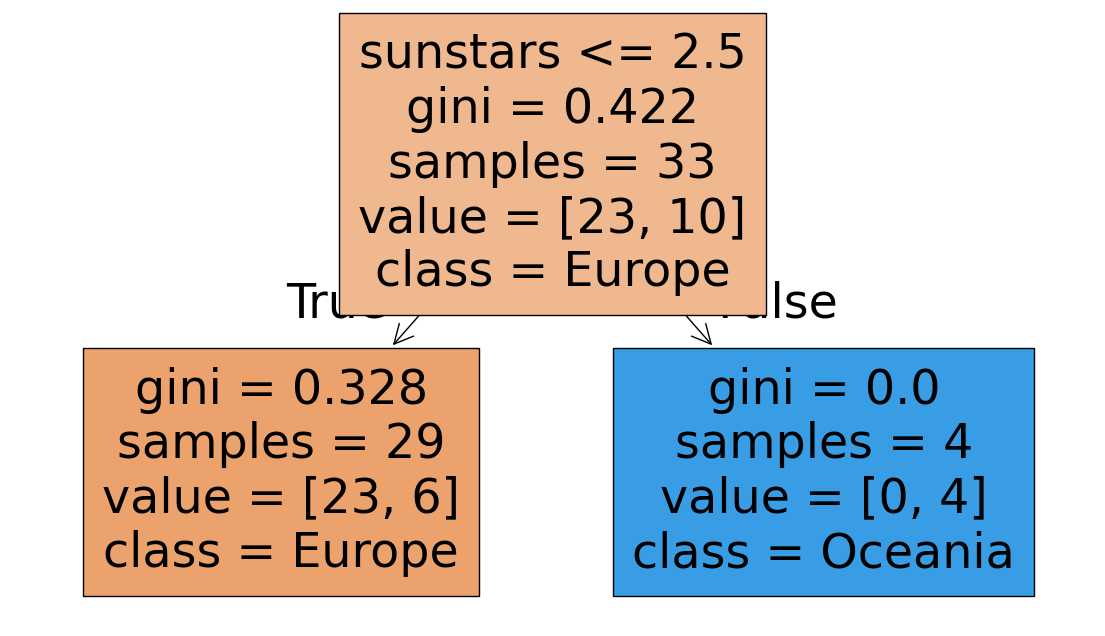

In [20]:
best_depth = depths[np.argmax(acc_depth)]
max_acc = np.max(acc_depth)

print(f"Highest accuracy: {round(max_acc*100,2)}% at depth {best_depth}")
plt.figure(figsize=(14,8))

dt = DecisionTreeClassifier(random_state=1, max_depth=best_depth)
dt.fit(train_data, train_labels)

tree.plot_tree(
    dt,
    feature_names=train_data.columns,
    class_names=['Europe', 'Oceania'],
    filled=True
)

plt.show()


### ✂️ Pruning with ccp_alpha

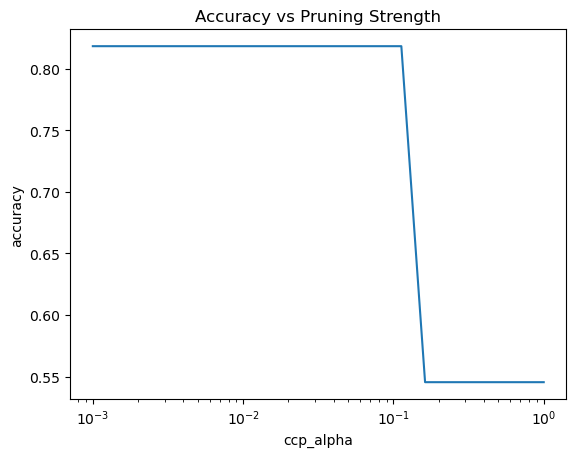

Highest pruned accuracy: 81.82% at ccp_alpha 0.001


In [21]:
ccp = np.logspace(-3, 0, 20)
acc_pruned = []

for alpha in ccp:
    dt_prune = DecisionTreeClassifier(
        random_state=1,
        max_depth=best_depth,
        ccp_alpha=alpha
    )
    dt_prune.fit(train_data, train_labels)
    acc_pruned.append(dt_prune.score(test_data, test_labels))

plt.plot(ccp, acc_pruned)
plt.xscale('log')
plt.xlabel("ccp_alpha")
plt.ylabel("accuracy")
plt.title("Accuracy vs Pruning Strength")
plt.show()
best_ccp = ccp[np.argmax(acc_pruned)]
max_acc_pruned = np.max(acc_pruned)

print(f"Highest pruned accuracy: {round(max_acc_pruned*100,2)}% at ccp_alpha {round(best_ccp,4)}")


### Final Pruned Model

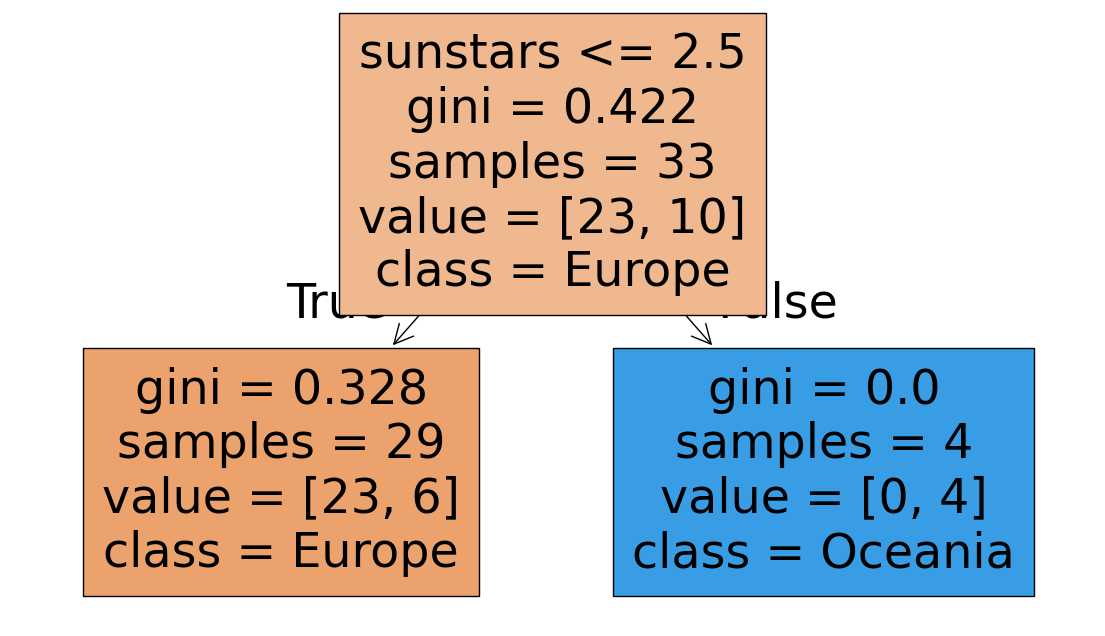

In [22]:
dt_final = DecisionTreeClassifier(
    random_state=1,
    max_depth=best_depth,
    ccp_alpha=best_ccp
)

dt_final.fit(train_data, train_labels)

plt.figure(figsize=(14,8))

tree.plot_tree(
    dt_final,
    feature_names=train_data.columns,
    class_names=['Europe', 'Oceania'],
    filled=True
)

plt.show()
